Training Data Overview:
            Airline Date_of_Journey Source Destination            Route  \
count         10683           10683  10683       10683            10682   
unique           12              44      5           6              128   
top     Jet Airways      18/05/2019  Delhi      Cochin  DEL ? BOM ? COK   
freq           3849             504   4537        4537             2376   
mean            NaN             NaN    NaN         NaN              NaN   
std             NaN             NaN    NaN         NaN              NaN   
min             NaN             NaN    NaN         NaN              NaN   
25%             NaN             NaN    NaN         NaN              NaN   
50%             NaN             NaN    NaN         NaN              NaN   
75%             NaN             NaN    NaN         NaN              NaN   
max             NaN             NaN    NaN         NaN              NaN   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info  \
count 

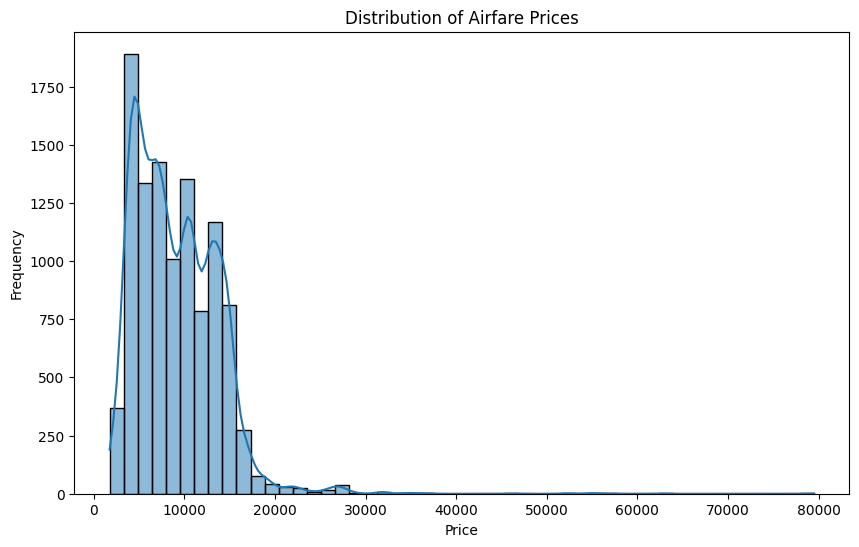

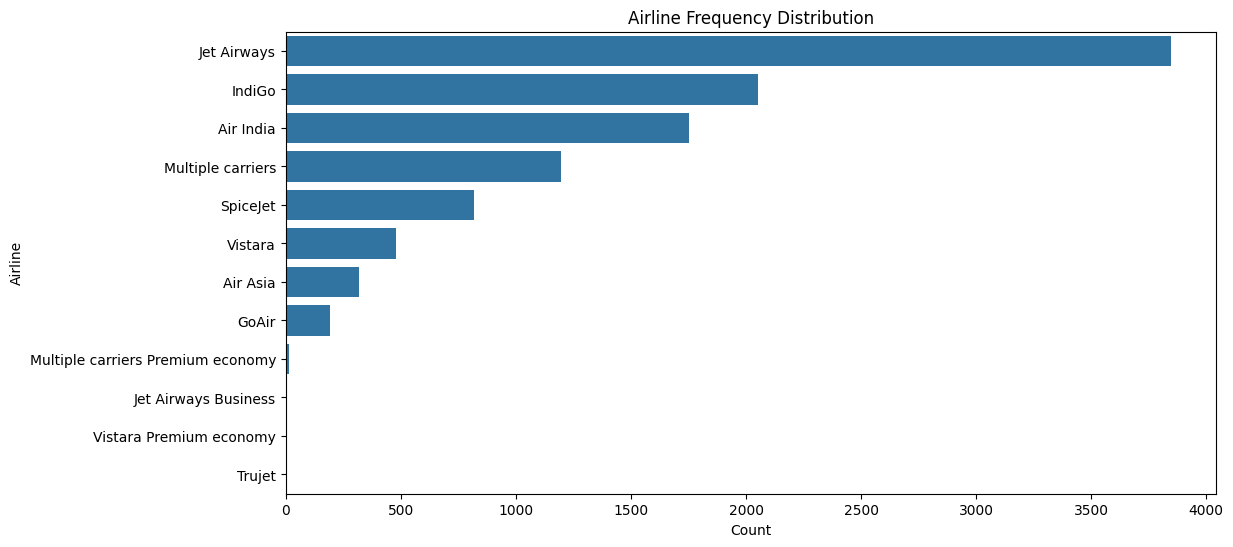

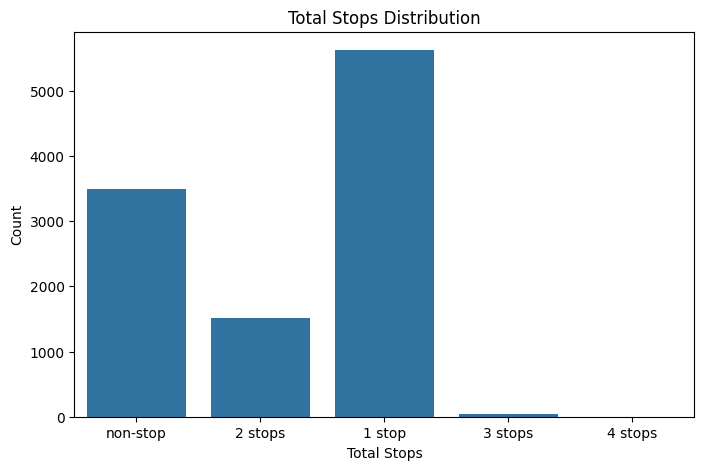

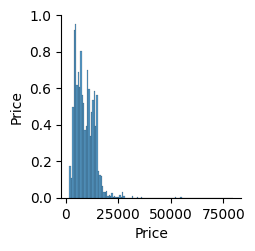

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_file_path = "Train.csv"
test_file_path = "Test.csv"

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# Display basic statistics
print("Training Data Overview:")
print(train_df.describe(include='all'))

# Check for missing values
print("Missing Values:")
print(train_df.isnull().sum())

# Visualizing target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Price'], bins=50, kde=True)
plt.title('Distribution of Airfare Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Countplot of Airlines
plt.figure(figsize=(12, 6))
sns.countplot(y=train_df['Airline'], order=train_df['Airline'].value_counts().index)
plt.title("Airline Frequency Distribution")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()

# Countplot of Total Stops
plt.figure(figsize=(8, 5))
sns.countplot(x=train_df['Total_Stops'])
plt.title("Total Stops Distribution")
plt.xlabel("Total Stops")
plt.ylabel("Count")
plt.show()

# Pairplot for numerical variables
sns.pairplot(train_df[['Price']])
plt.show()


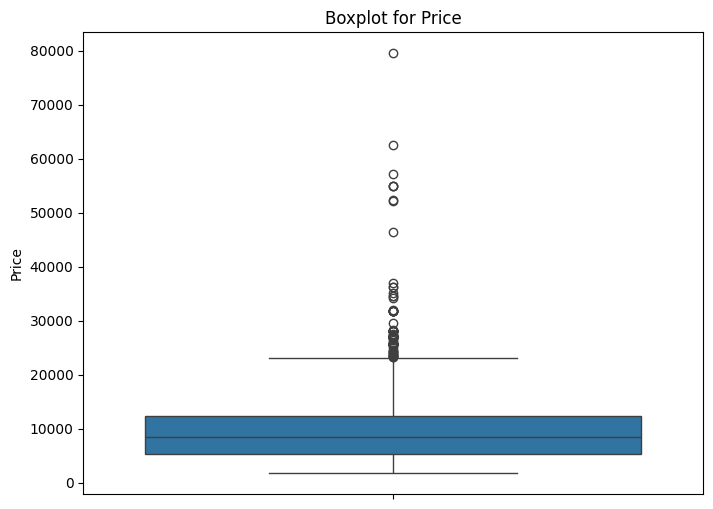

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

# Combine datasets to analyze both
combined_data = pd.concat([train_data, test_data], axis=0)

# Function to detect and visualize outliers using boxplot
def detect_outliers(data):
    # Create a boxplot for each numeric feature in the dataset
    numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
    for feature in numeric_features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data[feature])
        plt.title(f'Boxplot for {feature}')
        plt.show()

# Call the function on combined data
detect_outliers(combined_data)


In [2]:
import numpy as np

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from "Price" column
combined_data_cleaned = remove_outliers_iqr(combined_data, "Price")


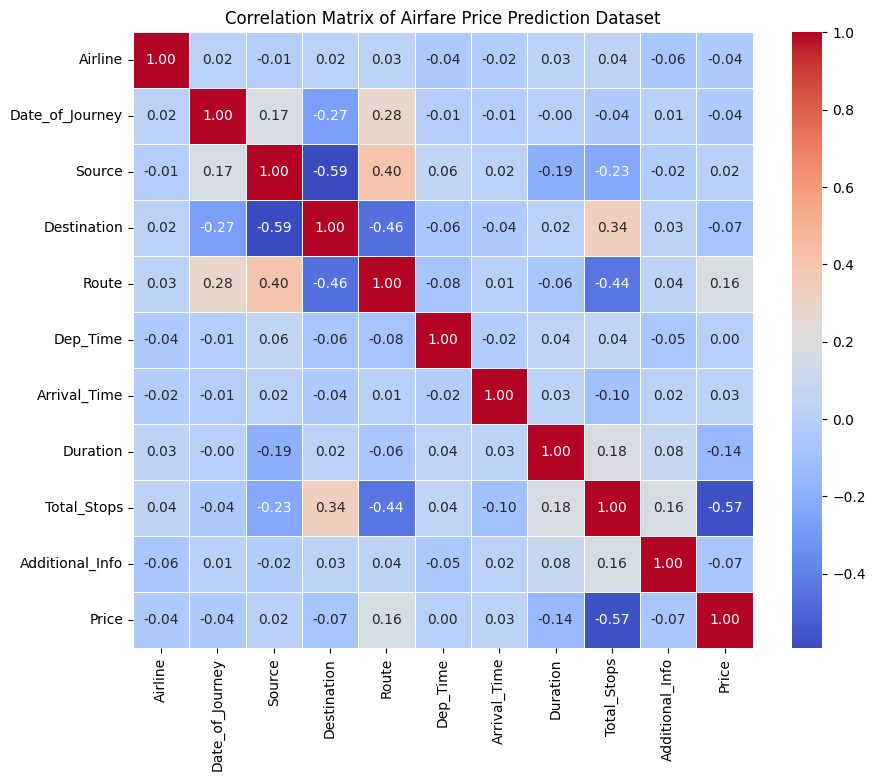

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train_path = "Train.csv"
df = pd.read_csv(train_path)

# Convert categorical columns to numerical using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Airfare Price Prediction Dataset")
plt.show()


In [15]:
import pandas as pd
import numpy as np

# Load the dataset
train_file_path = "Train.csv"
test_file_path = "Test.csv"

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# Step 1: Convert Date_of_Journey into Day, Month, Year
train_df['Day'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce').dt.day
train_df['Month'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce').dt.month
train_df['Year'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce').dt.year
train_df.drop(['Date_of_Journey'], axis=1, inplace=True)

# Step 2: Extract Hour and Minute from Dep_Time and Arrival_Time
train_df['Dep_Hour'] = pd.to_datetime(train_df['Dep_Time'], format='%H:%M', errors='coerce').dt.hour
train_df['Dep_Minute'] = pd.to_datetime(train_df['Dep_Time'], format='%H:%M', errors='coerce').dt.minute
train_df.drop(['Dep_Time'], axis=1, inplace=True)

train_df['Arrival_Hour'] = pd.to_datetime(train_df['Arrival_Time'], format='%H:%M', errors='coerce').dt.hour
train_df['Arrival_Minute'] = pd.to_datetime(train_df['Arrival_Time'], format='%H:%M', errors='coerce').dt.minute
train_df.drop(['Arrival_Time'], axis=1, inplace=True)

# Step 3: Convert Duration into Duration_hours and Duration_minutes
def extract_duration(duration):
    hours, minutes = 0, 0
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
    if 'm' in duration:
        minutes = int(duration.split('m')[0].split()[-1].strip())
    return hours, minutes

train_df[['Duration_hours', 'Duration_minutes']] = train_df['Duration'].apply(lambda x: pd.Series(extract_duration(str(x))))
train_df.drop(['Duration'], axis=1, inplace=True)

# Step 4: Convert Total_Stops into an integer format
train_df['Total_Stops'] = train_df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}).astype(float)

# Step 5: Convert categorical variables into numerical representations (One-Hot Encoding)
categorical_columns = ['Airline', 'Source', 'Destination']
train_df = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True)

# Step 6: Handle missing values
train_df.dropna(inplace=True)

# Display processed dataset
print(train_df.head())


                   Route  Total_Stops Additional_Info  Price  Day  Month  \
1  CCU ? IXR ? BBI ? BLR          2.0         No info   7662    1      5   
3        CCU ? NAG ? BLR          1.0         No info   6218   12      5   
4        BLR ? NAG ? DEL          1.0         No info  13302    1      3   
5              CCU ? BLR          0.0         No info   3873   24      6   
9        DEL ? BOM ? COK          1.0         No info   8625   27      5   

   Year  Dep_Hour  Dep_Minute  Arrival_Hour  ...  \
1  2019         5          50          13.0  ...   
3  2019        18           5          23.0  ...   
4  2019        16          50          21.0  ...   
5  2019         9           0          11.0  ...   
9  2019        11          25          19.0  ...   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
1                            False           False         False   
3                            False           False         False   
4                         

C:\Users\ratho\AppData\Local\Temp\ipykernel_9228\1103536415.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Total_Stops'] = train_df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}).astype(float)


In [16]:
# Step 7: Normality Test
shapiro_test = stats.shapiro(train_df['Price'])
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}, P-Value: {shapiro_test.pvalue}")

# Step 8: F-Test
group1 = train_df[train_df['Total_Stops'] == 0]['Price']
group2 = train_df[train_df['Total_Stops'] == 1]['Price']
if len(group1) > 1 and len(group2) > 1:
    f_stat, f_pvalue = stats.levene(group1, group2)
    print(f"F-Test Statistic: {f_stat}, P-Value: {f_pvalue}")

# Step 9: T-Test
if len(group1) > 1 and len(group2) > 1:
    t_stat, t_pvalue = stats.ttest_ind(group1, group2, equal_var=False)
    print(f"T-Test Statistic: {t_stat}, P-Value: {t_pvalue}")

# Step 10: Chi-Square Test
cross_tab = pd.crosstab(train_df['Total_Stops'], train_df['Year'])
chi2_stat, chi2_pvalue, _, _ = stats.chi2_contingency(cross_tab)
print(f"Chi-Square Test Statistic: {chi2_stat}, P-Value: {chi2_pvalue}")

# Step 11: ANOVA Test
anova_groups = [train_df[train_df['Total_Stops'] == i]['Price'] for i in train_df['Total_Stops'].unique()]
if all(len(g) > 1 for g in anova_groups):
    anova_stat, anova_pvalue = stats.f_oneway(*anova_groups)
    print(f"ANOVA Test Statistic: {anova_stat}, P-Value: {anova_pvalue}")

# Discussion
print("\nDiscussion:")
print("- Normality tests help determine if the data follows a normal distribution, crucial for parametric tests.")
print("- The F-Test checks for variance equality between different stop categories.")
print("- The T-Test compares mean airfare prices between different stop categories.")
print("- The Chi-Square test evaluates the relationship between total stops and the year of travel.")
print("- The ANOVA test examines whether multiple stop categories have significant price differences.")


Shapiro-Wilk Test Statistic: 0.8306880873967522, P-Value: 2.533817353989708e-63
F-Test Statistic: 770.6591903296477, P-Value: 9.849031162688009e-160
T-Test Statistic: -54.62635838995784, P-Value: 0.0
Chi-Square Test Statistic: 0.0, P-Value: 1.0
ANOVA Test Statistic: 1194.5890482687876, P-Value: 0.0

Discussion:
- Normality tests help determine if the data follows a normal distribution, crucial for parametric tests.
- The F-Test checks for variance equality between different stop categories.
- The T-Test compares mean airfare prices between different stop categories.
- The Chi-Square test evaluates the relationship between total stops and the year of travel.
- The ANOVA test examines whether multiple stop categories have significant price differences.


c:\Users\ratho\Desktop\CONESTOGA\CSCN8010\ML_labs\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6348.
  res = hypotest_fun_out(*samples, **kwds)


Interpretation of Test Results
Shapiro-Wilk Test

Test Statistic: 0.83
P-Value: 2.53e-63 (very small)
- Interpretation: Since the p-value is less than 0.05, we reject the null hypothesis, meaning the airfare price data does not follow a normal distribution.
F-Test (Levene’s Test for Variance Comparison)

Test Statistic: 770.66
P-Value: 9.84e-160 (almost 0)
- Interpretation: Since the p-value is less than 0.05, we reject the null hypothesis, meaning there is a significant difference in variance between the two compared groups (e.g., direct flights vs. 1-stop flights).
T-Test (Comparing Two Groups)

Test Statistic: -54.63
P-Value: 0.0
- Interpretation: The p-value is extremely small, meaning we reject the null hypothesis, indicating a significant difference in the mean airfare prices between the two compared groups (e.g., direct vs. 1-stop flights).
Chi-Square Test (Association between Categorical Variables)

Test Statistic: 0.0
P-Value: 1.0
- Interpretation: The p-value is very high (1.0), meaning we fail to reject the null hypothesis, indicating no significant relationship between the categorical variables tested (e.g., Total_Stops and Year).
ANOVA Test (Comparing Multiple Groups)

Test Statistic: 1194.59
P-Value: 0.0
- Interpretation: The p-value is extremely small, meaning we reject the null hypothesis, indicating that at least one group’s mean airfare price is significantly different from the others.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
train_file_path = "Train.csv"
test_file_path = "Test.csv"

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# Step 1: Convert Date_of_Journey into Day, Month, Year
train_df['Day'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce').dt.day
train_df['Month'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce').dt.month
train_df['Year'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce').dt.year
train_df.drop(['Date_of_Journey'], axis=1, inplace=True)

# Step 2: Extract Hour and Minute from Dep_Time and Arrival_Time
train_df['Dep_Hour'] = pd.to_datetime(train_df['Dep_Time'], format='%H:%M', errors='coerce').dt.hour
train_df['Dep_Minute'] = pd.to_datetime(train_df['Dep_Time'], format='%H:%M', errors='coerce').dt.minute
train_df.drop(['Dep_Time'], axis=1, inplace=True)

train_df['Arrival_Hour'] = pd.to_datetime(train_df['Arrival_Time'], format='%H:%M', errors='coerce').dt.hour
train_df['Arrival_Minute'] = pd.to_datetime(train_df['Arrival_Time'], format='%H:%M', errors='coerce').dt.minute
train_df.drop(['Arrival_Time'], axis=1, inplace=True)

# Step 3: Convert Duration into Duration_hours and Duration_minutes
def extract_duration(duration):
    hours, minutes = 0, 0
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
    if 'm' in duration:
        minutes = int(duration.split('m')[0].split()[-1].strip())
    return hours, minutes

train_df[['Duration_hours', 'Duration_minutes']] = train_df['Duration'].apply(lambda x: pd.Series(extract_duration(str(x))))
train_df.drop(['Duration'], axis=1, inplace=True)

# Step 4: Convert Total_Stops into an integer format
train_df['Total_Stops'] = train_df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}).astype(float)

# Step 5: Convert categorical variables into numerical representations (One-Hot Encoding)
categorical_columns = ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']
train_df = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True)

# Step 6: Handle missing values
train_df.dropna(inplace=True)

# Step 7: Ensure only numerical data is used
numeric_features = train_df.select_dtypes(include=[np.number]).columns
train_df = train_df[numeric_features]

# Step 8: Standardizing the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_df.drop(columns=['Price']))

# Step 9: Splitting data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, train_df['Price'], test_size=0.2, random_state=42)

# Step 10: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 11: Evaluate Model Performance
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2): {r2}")


Linear Regression Model Performance:
Mean Absolute Error (MAE): 2180.1326740101963
Mean Squared Error (MSE): 9503146.119857652
Root Mean Squared Error (RMSE): 3082.717327271129
R-Squared (R2): 0.45030099997408557


C:\Users\ratho\AppData\Local\Temp\ipykernel_9228\2442203142.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Total_Stops'] = train_df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}).astype(float)


In [27]:
! pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 2.6/124.9 MB 15.0 MB/s eta 0:00:09
   -- ------------------------------------- 6.3/124.9 MB 16.7 MB/s eta 0:00:08
   --- ------------------------------------ 11.0/124.9 MB 19.1 MB/s eta 0:00:06
   ---- ----------------------------------- 15.5/124.9 MB 19.8 MB/s eta 0:00:06
   ------ --------------------------------- 19.9/124.9 MB 20.6 MB/s eta 0:00:06
   ------- -------------------------------- 24.4/124.9 MB 20.8 MB/s eta 0:00:05
   -------- ------------------------------- 28.0/124.9 MB 20.2 MB/s eta 0:00:05
   ---------- ----------------------------- 32.2/124.9 MB 20.3 MB/s eta 0:00:05
   ----------- ---------------------------- 37.0/124.9 MB 20.6 MB/s eta 0:00:05
   ------------- -------------------------- 41.2/124.9 MB 20.8 MB/s eta 0:00:05
   -------------- ------------------------- 44.8/124.9 MB 20.5 MB/s eta 0:00:04
   --------------- ------------------------ 49.3/12


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

# Load the dataset
train_file_path = "Train.csv"
test_file_path = "Test.csv"

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# Step 1: Convert Date_of_Journey into Day, Month, Year
train_df['Day'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce').dt.day
train_df['Month'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce').dt.month
train_df['Year'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce').dt.year
train_df.drop(['Date_of_Journey'], axis=1, inplace=True)

# Step 2: Extract Hour and Minute from Dep_Time and Arrival_Time
train_df['Dep_Hour'] = pd.to_datetime(train_df['Dep_Time'], format='%H:%M', errors='coerce').dt.hour
train_df['Dep_Minute'] = pd.to_datetime(train_df['Dep_Time'], format='%H:%M', errors='coerce').dt.minute
train_df.drop(['Dep_Time'], axis=1, inplace=True)

train_df['Arrival_Hour'] = pd.to_datetime(train_df['Arrival_Time'], format='%H:%M', errors='coerce').dt.hour
train_df['Arrival_Minute'] = pd.to_datetime(train_df['Arrival_Time'], format='%H:%M', errors='coerce').dt.minute
train_df.drop(['Arrival_Time'], axis=1, inplace=True)

# Step 3: Convert Duration into Duration_hours and Duration_minutes
def extract_duration(duration):
    hours, minutes = 0, 0
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
    if 'm' in duration:
        minutes = int(duration.split('m')[0].split()[-1].strip())
    return hours, minutes

train_df[['Duration_hours', 'Duration_minutes']] = train_df['Duration'].apply(lambda x: pd.Series(extract_duration(str(x))))
train_df.drop(['Duration'], axis=1, inplace=True)

# Step 4: Convert Total_Stops into an integer format
train_df['Total_Stops'] = train_df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}).astype(float)

# Step 5: Convert categorical variables into numerical representations (One-Hot Encoding)
categorical_columns = ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']
train_df = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True)

# Step 6: Handle missing values
train_df.dropna(inplace=True)

# Step 7: Apply Log Transformation to Price to Reduce Skewness
train_df['Price'] = np.log1p(train_df['Price'])

# Step 8: Standardizing the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_df.drop(columns=['Price']))

# Step 9: Splitting data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, train_df['Price'], test_size=0.2, random_state=42)

# Step 10: Implement Polynomial Regression for Feature Engineering
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 11: Train Linear Regression with Polynomial Features
linear_model = make_pipeline(StandardScaler(), LinearRegression())
linear_model.fit(X_train_poly, y_train)

# Step 12: Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 13: Train XGBoost Model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 14: Evaluate Model Performance
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Model Performance:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-Squared (R2): {r2}")
    print("-" * 50)

# Evaluate all models
evaluate_model(linear_model, X_test_poly, y_test, "Polynomial Linear Regression")
evaluate_model(rf_model, X_test, y_test, "Random Forest")
evaluate_model(xgb_model, X_test, y_test, "XGBoost")

C:\Users\ratho\AppData\Local\Temp\ipykernel_9228\853051662.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Total_Stops'] = train_df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}).astype(float)


Polynomial Linear Regression Model Performance:
Mean Absolute Error (MAE): 1589818180403.9128
Mean Squared Error (MSE): 6.953252279039133e+26
Root Mean Squared Error (RMSE): 26369020230260.99
R-Squared (R2): -2.8429866009106527e+27
--------------------------------------------------
Random Forest Model Performance:
Mean Absolute Error (MAE): 0.06965397699825308
Mean Squared Error (MSE): 0.014187956882440917
Root Mean Squared Error (RMSE): 0.11911321036073588
R-Squared (R2): 0.9419894896771218
--------------------------------------------------
XGBoost Model Performance:
Mean Absolute Error (MAE): 0.08192096791038471
Mean Squared Error (MSE): 0.014241348128216069
Root Mean Squared Error (RMSE): 0.11933711965778321
R-Squared (R2): 0.9417711880964323
--------------------------------------------------


C:\Users\ratho\AppData\Local\Temp\ipykernel_9228\3469969146.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Total_Stops'] = train_df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}).astype(float)


Random Forest Model Performance:
Confusion Matrix:
[[602  51]
 [ 35 582]]
Precision: 0.919431279620853
F1 Score: 0.9312
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       653
           1       0.92      0.94      0.93       617

    accuracy                           0.93      1270
   macro avg       0.93      0.93      0.93      1270
weighted avg       0.93      0.93      0.93      1270

--------------------------------------------------


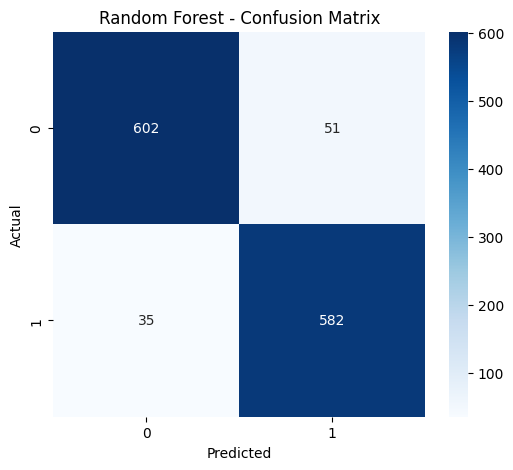

XGBoost Model Performance:
Confusion Matrix:
[[616  37]
 [ 28 589]]
Precision: 0.9408945686900958
F1 Score: 0.9477071600965407
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       653
           1       0.94      0.95      0.95       617

    accuracy                           0.95      1270
   macro avg       0.95      0.95      0.95      1270
weighted avg       0.95      0.95      0.95      1270

--------------------------------------------------


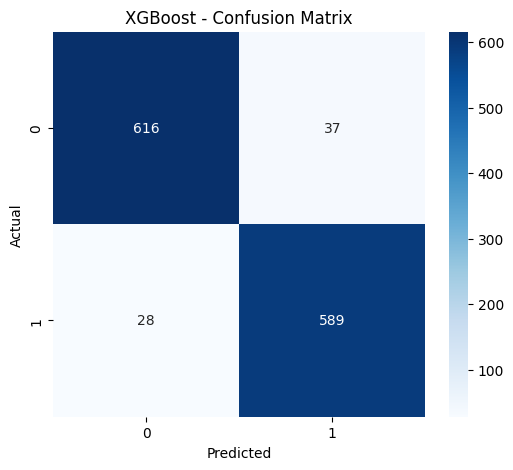

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score

# Load the dataset
train_file_path = "Train.csv"
test_file_path = "Test.csv"

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# Step 1: Convert Date_of_Journey into Day, Month, Year
train_df['Day'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce').dt.day
train_df['Month'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce').dt.month
train_df['Year'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce').dt.year
train_df.drop(['Date_of_Journey'], axis=1, inplace=True)

# Step 2: Extract Hour and Minute from Dep_Time and Arrival_Time
train_df['Dep_Hour'] = pd.to_datetime(train_df['Dep_Time'], format='%H:%M', errors='coerce').dt.hour
train_df['Dep_Minute'] = pd.to_datetime(train_df['Dep_Time'], format='%H:%M', errors='coerce').dt.minute
train_df.drop(['Dep_Time'], axis=1, inplace=True)

train_df['Arrival_Hour'] = pd.to_datetime(train_df['Arrival_Time'], format='%H:%M', errors='coerce').dt.hour
train_df['Arrival_Minute'] = pd.to_datetime(train_df['Arrival_Time'], format='%H:%M', errors='coerce').dt.minute
train_df.drop(['Arrival_Time'], axis=1, inplace=True)

# Step 3: Convert Duration into Duration_hours and Duration_minutes
def extract_duration(duration):
    hours, minutes = 0, 0
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
    if 'm' in duration:
        minutes = int(duration.split('m')[0].split()[-1].strip())
    return hours, minutes

train_df[['Duration_hours', 'Duration_minutes']] = train_df['Duration'].apply(lambda x: pd.Series(extract_duration(str(x))))
train_df.drop(['Duration'], axis=1, inplace=True)

# Step 4: Convert Total_Stops into an integer format
train_df['Total_Stops'] = train_df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}).astype(float)

# Step 5: Convert categorical variables into numerical representations (One-Hot Encoding)
categorical_columns = ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']
train_df = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True)

# Step 6: Handle missing values
train_df.dropna(inplace=True)

# Step 7: Standardizing the dataset
scaler = StandardScaler()
X = scaler.fit_transform(train_df.drop(columns=['Price']))
y = (train_df['Price'] > train_df['Price'].median()).astype(int)  # Convert Price into a classification problem

# Step 8: Splitting data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)

# Step 10: Train XGBoost Classifier
xgb_model = XGBClassifier(objective='binary:logistic', n_estimators=200, max_depth=10, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 11: Evaluate Model Performance
def evaluate_classification_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"{model_name} Model Performance:")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1}")
    print("Classification Report:")
    print(report)
    print("-" * 50)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

# Evaluate the models
evaluate_classification_model(rf_model, X_test, y_test, "Random Forest")
evaluate_classification_model(xgb_model, X_test, y_test, "XGBoost")
